## 4.1 선형 회귀를 이용한 분류

In [3]:
import tensorflow as tf # 핵심 학습 알고리즘을 위해 텐서플로우를 불러옵니다
import numpy as np # 데이터 처리를 위해 NumPy를 불러옵니다
import matplotlib.pyplot as plt # 시각화를 위해 matplotlib를 불러옵니다

In [10]:
x_label0 = np.random.normal(5, 1, 10) # 가짜 데이터를 초기화합니다. 각각의 레이블에 대해 10개의 인스턴스를 가집니다
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1) # 레이블을 초기화합니다

learning_rate = 0.001 # 하이퍼파라미터를 선언합니다
training_epochs = 1000

X = tf.placeholder("float")	 # 입력/출력 쌍에 대해 플레이스홀더 노드를 설정합니다
Y = tf.placeholder("float")

def model(X, w): # y = w1 * x + w0 의 선형 모델을 정의합니다
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters") # 파라미터 변수를 설정합니다
y_model = model(X, w) # 여러번 참조하게 될 도우미 변수를 정의합니다
cost = tf.reduce_sum(tf.square(Y-y_model)) # 비용 함수를 정의합니다

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 파라미터를 학습하는 규칙을 정의합니다

## 4.2 & 4.3 그래프 실행 및 정확도 측정

0 8.862189
100 2.4499562
200 1.5096667
300 1.3689471
400 1.347888
500 1.3447362
600 1.3442646
700 1.344194
800 1.3441834
900 1.3441819
learned parameters [ 1.2448984  -0.21630573]
accuracy 0.95


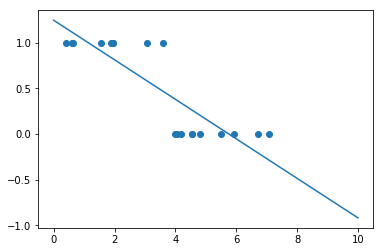

In [11]:
sess = tf.Session() # 새로운 세션을 열고 변수들을 초기화합니다
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs): # 학습 연산을 반복해 실행합니다
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels}) # 현재의 파라미터로 연산된 비용을 기록합니다
    if epoch % 100 == 0: # 코드 실행 중에 로그 정보를 출력합니다
        print(epoch, current_cost)
        
w_val = sess.run(w) # 학습된 파라미터를 출력합니다
print('learned parameters', w_val)

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5))) # 모델의 응답이 0.5보다 크면 양성 레이블이, 0.5보다 작으면 음성 레이블이 됩니다
accuracy = tf.reduce_mean(tf.to_float(correct_prediction)) # 성공율을 계산합니다

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels})) # 주어진 입력으로부터 정확도를 출력합니다

sess.close() # 더이상 사용하지 않게 되면 세션을 닫아줍니다

all_xs = np.linspace(0, 10, 100) # 최적의 선을 그려줍니다
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()

## 4.4 선형 회귀가 분류에 처참하게 실패하는 경우

In [12]:
x_label0 = np.append(np.random.normal(5, 1, 9), 20) # 가짜 데이터를 초기화합니다. 각각의 레이블에 대해 10개의 인스턴스를 가집니다
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1) # 레이블을 초기화합니다

learning_rate = 0.001 # 하이퍼파라미터를 선언합니다
training_epochs = 1000

X = tf.placeholder("float")	 # 입력/출력 쌍에 대해 플레이스홀더 노드를 설정합니다
Y = tf.placeholder("float")

def model(X, w): # y = w1 * x + w0 의 선형 모델을 정의합니다
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters") # 파라미터 변수를 설정합니다
y_model = model(X, w) # 여러번 참조하게 될 도우미 변수를 정의합니다
cost = tf.reduce_sum(tf.square(Y-y_model)) # 비용 함수를 정의합니다

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 파라미터를 학습하는 규칙을 정의합니다

0 9.216494
100 3.509781
200 3.3506393
300 3.3461037
400 3.3459744
500 3.3459706
600 3.3459706
700 3.3459704
800 3.3459709
900 3.3459709
learned parameters [ 0.8193098  -0.07271089]
accuracy 0.95


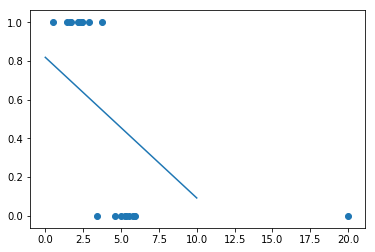

In [13]:
sess = tf.Session() # 새로운 세션을 열고 변수들을 초기화합니다
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs): # 학습 연산을 반복해 실행합니다
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels}) # 현재의 파라미터로 연산된 비용을 기록합니다
    if epoch % 100 == 0: # 코드 실행 중에 로그 정보를 출력합니다
        print(epoch, current_cost)
        
w_val = sess.run(w) # 학습된 파라미터를 출력합니다
print('learned parameters', w_val)

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5))) # 모델의 응답이 0.5보다 크면 양성 레이블이, 0.5보다 작으면 음성 레이블이 됩니다
accuracy = tf.reduce_mean(tf.to_float(correct_prediction)) # 성공율을 계산합니다

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels})) # 주어진 입력으로부터 정확도를 출력합니다

sess.close() # 더이상 사용하지 않게 되면 세션을 닫아줍니다

all_xs = np.linspace(0, 10, 100) # 최적의 선을 그려줍니다
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()